# Analyze 2012-2016 Revenue Performance

In this challenge, I created a Python script for analyzing the financial records of PyBank.

This notebook will bring all the data sources together and format them for further analysis.


## Data Sources:
* revenue_2009_2016.csv : Processed data from the data-prep


Each dataset is composed of two columns: Date and Revenue.



### Task is to create a Python script that analyzes the records to calculate each of the following:

- The total number of months included in the dataset.

- The total amount of revenue gained over the entire period.

- The average change in revenue between months over the entire period.

- The greatest increase in revenue (date and amount) over the entire period.

- The greatest decrease in revenue (date and amount) over the entire period.


### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [3]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [4]:
# Directory Location and Filenames

dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [5]:
# Load Data into csv

df = pd.read_csv(os.path.join(dir, file), parse_dates=[0], index_col='Date')
df[:5]

,Revenue
Date,
2009-01-01,943690.0
2009-02-01,1062565.0
2009-03-01,210079.0
2009-04-01,-735286.0
2009-05-01,842933.0


In [6]:
## Display - typeformat

pd.set_option('display.float_format', '{:,.0f}'.format)

In [7]:
df.describe()

,Revenue
count,86
mean,"650,527"
std,"680,460"
min,"-1,063,151"
25%,"279,551"
50%,"686,900"
75%,"1,118,162"
max,"2,211,086"


In [8]:
df.dtypes

Revenue    float64
dtype: object

In [9]:
df.memory_usage(deep=True)

Index      688
Revenue    688
dtype: int64

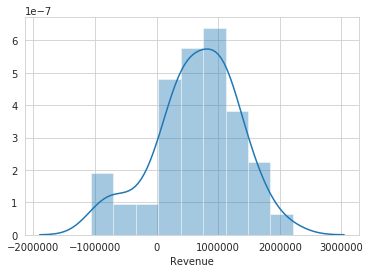

In [10]:
# Plot the Distribution for Revenue

sns.distplot(df['Revenue'])

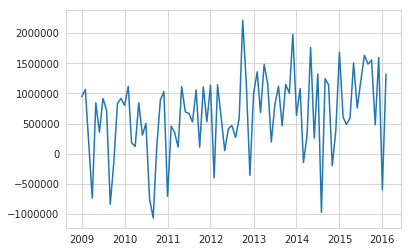

In [11]:
# Plot the Distribution for Revenue

sns.lineplot(data=df['Revenue'])

In [12]:
# Summarizing Stocks by Quarter
# Highligh - Max Revenue
# Red - Revenue Loss

dfq = pd.DataFrame(df.resample('Q').Revenue.sum())
dfq.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Revenue
Date,
2009-03-31 00:00:00,2.21633e+06
2009-06-30 00:00:00,466338
2009-09-30 00:00:00,800912
2009-12-31 00:00:00,1.60255e+06
2010-03-31 00:00:00,2.09836e+06
2010-06-30 00:00:00,1.27245e+06
2010-09-30 00:00:00,-1.30949e+06
2010-12-31 00:00:00,2.02948e+06
2011-03-31 00:00:00,110632


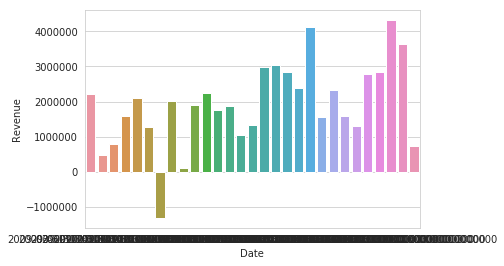

In [13]:
# Quarterly Revenue

sns.barplot(x=dfq.index, y=dfq.Revenue, data=dfq)

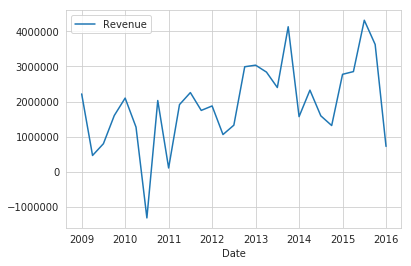

In [14]:
dfq.plot(kind='line')

In [15]:
# Summarizing Stocks by Year
# Highligh - Max Revenue
# Red - Revenue Loss

dfy = df.resample('A-DEC').sum()

dfy.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Revenue
Date,
2009-12-31 00:00:00,5.08614e+06
2010-12-31 00:00:00,4.0908e+06
2011-12-31 00:00:00,6.02598e+06
2012-12-31 00:00:00,7.25363e+06
2013-12-31 00:00:00,1.23976e+07
2014-12-31 00:00:00,6.80641e+06
2015-12-31 00:00:00,1.35608e+07
2016-12-31 00:00:00,723960


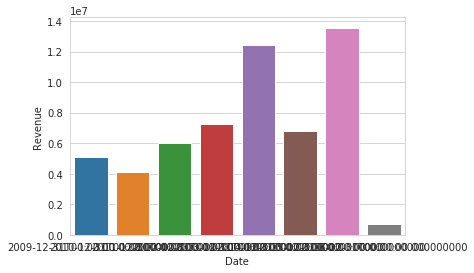

In [16]:
# Revenue Per year

sns.barplot(x=dfy.index, y=dfy.Revenue, data=dfy)